### Project Scenario Submission
### Mark Thorogood
#### March 17, 2025


In [78]:
# import required libraries
import pandas as pd
import numpy as nps
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import scipy.stats
from scipy.stats import norm

import statsmodels as sm                      

In [10]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df_housing = pd.read_csv(url)
df_housing.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Dataset:

* CRIM - per capita crime rate by town
* ZN - propertion of residential land zoned for lots over 25,000 sq. ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's


### Task 1: Generate Descriptive Statistics and Visualizations

#### "Median value of owner-occupied homes" provide a boxplot

[]

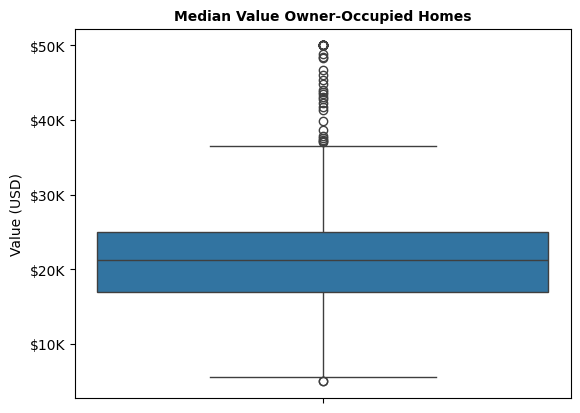

In [34]:
ax = sns.boxplot(y='MEDV',data=df_housing, width=.1)
ax.set_title('Median Value Owner-Occupied Homes', fontsize=10, fontweight='bold')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}K'))
plt.ylabel('Value (USD)')
plt.plot()

#### Provide a bar plot for the Charles river variable

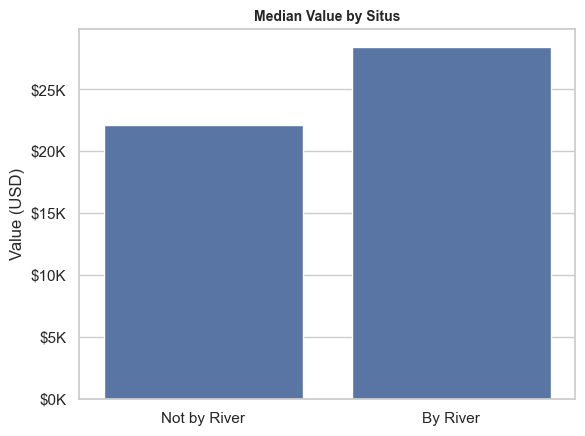

In [53]:
sns.set(style='whitegrid')
charles_river = df_housing.groupby('CHAS')[['MEDV']].mean().reset_index()
ax = sns.barplot(x='CHAS', y='MEDV', data=charles_river)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not by River', 'By River'])
ax.set_title('Median Value by Situs', fontsize=10, fontweight='bold')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}K'))
plt.xlabel('')
plt.ylabel('Value (USD)')
plt.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [57]:
df_housing.loc[(df_housing['AGE']<=35),'age_group'] = '35 and younger'
df_housing.loc[(df_housing['AGE']>35)&(df_housing['AGE']<70),'age_group'] = 'between 35 and 70'
df_housing.loc[(df_housing['AGE']>=70), 'age_group']= '70 and older'

[]

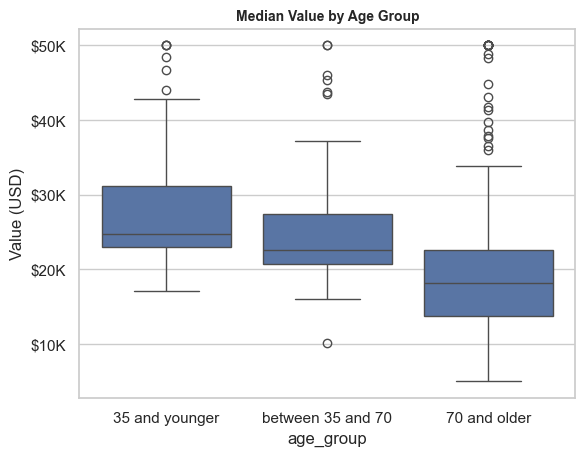

In [60]:
age_group_order = ['35 and younger', 'between 35 and 70', '70 and older']
ax = sns.boxplot(x='age_group', y='MEDV', data=df_housing, order=age_group_order)
ax.set_title('Median Value by Age Group', fontsize=10, fontweight='bold')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}K'))
plt.ylabel('Value (USD)')
plt.plot()

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

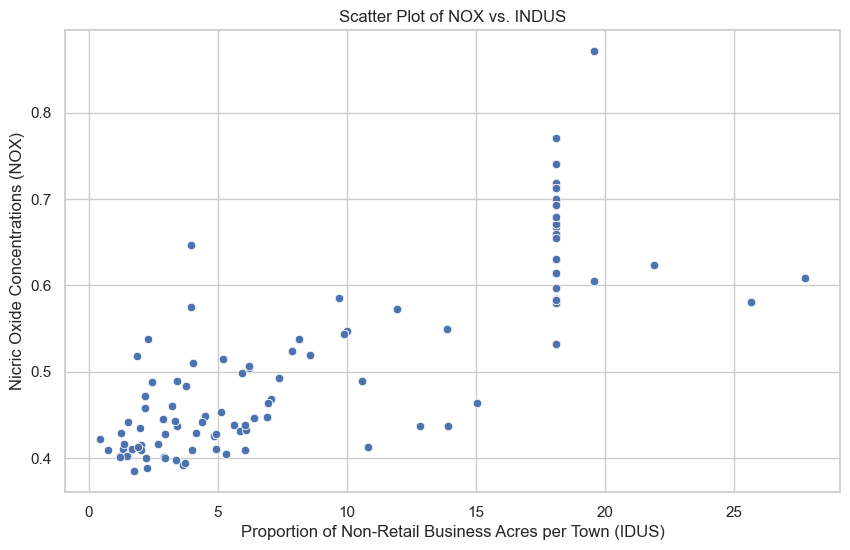

In [62]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='INDUS', y='NOX', data=df_housing)
ax.set_xlabel('Proportion of Non-Retail Business Acres per Town (IDUS)')
ax.set_ylabel('Nicric Oxide Concentrations (NOX)')
ax.set_title('Scatter Plot of NOX vs. INDUS')
plt.show()

#### Create a histogram for the pupil to teacher ratio variable

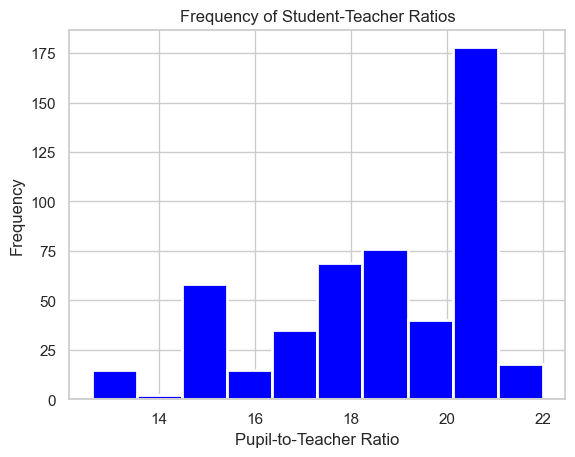

In [69]:
ax = sns.histplot(df_housing['PTRATIO'],
                  bins=10,
                  color='blue',
                  linewidth=2,
                  alpha=1)
ax.set(xlabel='Pupil-to-Teacher Ratio', ylabel='Frequency')
plt.show()

## Task 3: Use the appropirate statistical tests to answer the following questions

#### Is there a significant difference between the median value of houses bounded by the Charles River or not?

State the hypothosis: Location along the Charles River does not affect median house value.

* $H_0: \mu1 = \mu2$ (there is no difference between location and median value)
* $H_1: \mu1 \neq \mu2$ (there is a difference between location and median value)

* $\alpha=0.05$


In [72]:
scipy.stats.ttest_ind(df_housing[df['CHAS']==0]['MEDV'],df_housing[df['CHAS']==1]['MEDV'], equal_var=True)

TtestResult(statistic=np.float64(-3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

**Conclusion:** Since the p-value is less than the alpha value of 0.05, we rject the null hypothesis, and conclude that location along the Charles River affects median house value.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

State the hypothesis:
* $H_0: \mu1 = \mu2 = \mu3$ (there is no difference in the median value of home by age group)
* $H_1:$ (at least one of the means differ)

In [81]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data = df_housing).fit()
table = sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


**Conclusion:** Since the p-value is less than the alpha avlue, we reject the null hypothesis and conclude that there is significant evidence that at lease one of the means differ.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:
* $H_0:$ (Nitric Oxide concentration is not correlated to the Proportion of Non-Retail Business Acres per Town)
* $H_1:$ (Nitric Oxide concentration is correlated to the Proportion of Non-Retail Business Acres per Town)

* $\alpha=0.05$

In [84]:
import scipy
from scipy.stats import pearsonr
scipy.stats.pearsonr(df_housing['NOX'], df_housing['INDUS'])


PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

**Conclusion:** Since the p-value is < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitrix Oxide concentration and Non-Retail Business Acres per Town.

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

$\alpha=0.05$

In [85]:
X = df_housing['DIS']
y = df_housing['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        16:51:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The coefficient of the DIS variable is 1.0916, which means that for each additional unit increase in the weighted distance to the five Boston employment centers, the median vial of owner-occupied homes (MEDV) is expected to increase by approximately $1,901.60, holding all other factors constant.  Since the p-value is < 0.05, we accept the correlation as being statistically significant.